In [24]:
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage

print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))
print('OpenCV: {}'.format(cv2.__version__))
print('NumPy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Scikit-Image: {}'.format(skimage.__version__))

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
Keras: 2.9.0
OpenCV: 4.6.0
NumPy: 1.21.6
Matplotlib: 3.2.2
Scikit-Image: 0.18.3


In [25]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os
%matplotlib inline


In [109]:
def psnr(target, ref):
         
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    print(target_data.shape)
    print(ref_data.shape)
    diff = ref_data - target_data
    
    diff = diff.flatten('C')
    
    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.mean((target.astype('float') - ref.astype('float')) ** 2)
    
    return err

def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    
    return scores

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive/Deep_Learning/Data/source


/bin/bash: line 0: cd: /content/drive/MyDrive/Deep_Learning/Data/source: No such file or directory


In [101]:
drive_path = '/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/'

In [102]:
!ls /content/drive/MyDrive/DTU/DL/Deep_Learning/Data/

3051crop_weight_200.h5	source	stl10_binary	     STL10low
images			STL10	stl10_binary.tar.gz


In [103]:
print(len(os.listdir(drive_path)))

527


In [98]:
from PIL import Image

def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        # open the file
        img = cv2.imread(path + '/' + file)
        img2 = Image.open(path + '/' + file)
        
        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        img2 = img2.resize((new_width, new_height), Image.BILINEAR)

        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        img2 = img2.resize((w, h), Image.BILINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/{}'.format(file), img)
        #img2.save('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/{}'.format(file))
        
 

In [99]:
prepare_images(drive_path, 2) 

Saving image2.bmp
Saving image0.bmp
Saving image41.bmp
Saving image42.bmp
Saving image44.bmp
Saving image45.bmp
Saving image52.bmp
Saving image39.bmp
Saving image38.bmp
Saving image51.bmp
Saving image50.bmp
Saving image36.bmp
Saving image35.bmp
Saving image47.bmp
Saving image48.bmp
Saving image32.bmp
Saving image33.bmp
Saving image43.bmp
Saving image49.bmp
Saving image37.bmp
Saving image40.bmp
Saving image46.bmp
Saving image34.bmp
Saving image26.bmp
Saving image27.bmp
Saving image30.bmp
Saving image29.bmp
Saving image21.bmp
Saving image20.bmp
Saving image23.bmp
Saving image24.bmp
Saving image31.bmp
Saving image17.bmp
Saving image18.bmp
Saving image22.bmp
Saving image15.bmp
Saving image25.bmp
Saving image19.bmp
Saving image28.bmp
Saving image16.bmp
Saving image14.bmp
Saving image9.bmp
Saving image13.bmp
Saving image11.bmp
Saving image12.bmp
Saving image8.bmp
Saving image10.bmp
Saving image7.bmp
Saving image5.bmp
Saving image6.bmp
Saving image4.bmp
Saving image3.bmp
Saving image1.bmp
Sav

In [110]:
PSNR = []
MSE = []
SSIM = []
for file in os.listdir(drive_path):
    
    # open target and reference images
    target = cv2.imread('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10/{}'.format(file))
    ref = cv2.imread('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/{}'.format(file))
    print(file)
    
    # calculate score
    scores = compare_images(target, ref)
    PSNR.append(scores[0])
    MSE.append(scores[1])
    SSIM.append(scores[2])

    # print all three scores with new line characters (\n) 
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

image2.bmp
(64, 64, 3)
(64, 64, 3)
image2.bmp
PSNR: 24.02738441632784
MSE: 257.2420247395833
SSIM: 0.8511208943735683

image0.bmp
(64, 64, 3)
(64, 64, 3)
image0.bmp
PSNR: 20.38772889913544
MSE: 594.7130533854166
SSIM: 0.8016282016817562

image41.bmp
(64, 64, 3)
(64, 64, 3)
image41.bmp
PSNR: 24.220041921154806
MSE: 246.07991536458334
SSIM: 0.8403642673536805

image42.bmp
(64, 64, 3)
(64, 64, 3)
image42.bmp
PSNR: 21.46449206134944
MSE: 464.1209309895833
SSIM: 0.8033128541346044

image44.bmp
(64, 64, 3)
(64, 64, 3)
image44.bmp
PSNR: 28.09826536174225
MSE: 100.75203450520833
SSIM: 0.8958316883281011

image45.bmp
(64, 64, 3)
(64, 64, 3)
image45.bmp
PSNR: 24.058092655505817
MSE: 255.42952473958334
SSIM: 0.842046080891884

image52.bmp
(64, 64, 3)
(64, 64, 3)
image52.bmp
PSNR: 22.512371174285125
MSE: 364.622314453125
SSIM: 0.8237418769360964

image39.bmp
(64, 64, 3)
(64, 64, 3)
image39.bmp
PSNR: 23.23243254054993
MSE: 308.9136555989583
SSIM: 0.8176911609546872

image38.bmp
(64, 64, 3)
(64, 64,

In [111]:
np.mean(PSNR), np.mean(MSE), np.mean(SSIM)

(24.901701195549563, 239.30530240700114, 0.829301373412016)

In [67]:
def model():
    
    # define model type
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    # define optimizer
    adam = Adam(lr=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [68]:
def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img

In [76]:
def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/3051crop_weight_200.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    print(Y.shape)
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    
    # return images and scores
    return ref, degraded, output, scores

ref, degraded, output, scores = predict('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/image498.bmp')

(1, 63, 62, 1)
1/1 [==============================] - 0s 48ms/step
(51, 50, 3)
(51, 50, 3)
(51, 50, 3)
(51, 50, 3)


In [73]:
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

Degraded Image: 
PSNR: 25.33332323647358
MSE: 571.3066666666666
SSIM: 0.8431494739991927

Reconstructed Image: 
PSNR: 27.228292256018236
MSE: 369.29411764705884
SSIM: 0.8972788572254347



## STL10

In [104]:
def predict(image_path, srcnn):
    print(image_path)
    # load the degraded and reference images
    degraded = cv2.imread('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10low/{}'.format(file))
    ref = cv2.imread('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/STL10/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
        
    # return images and scores
    return compare_images(output, ref)

In [112]:
PSNR = []
MSE = []
SSIM = []

# load the srcnn model with weights
srcnn = model()
srcnn.load_weights('/content/drive/MyDrive/DTU/DL/Deep_Learning/Data/3051crop_weight_200.h5')

for file in os.listdir(drive_path):
      
    # calculate score
    scores = predict(file, srcnn)

    PSNR.append(scores[0])
    MSE.append(scores[1])
    SSIM.append(scores[2])


np.mean(PSNR), np.mean(MSE), np.mean(SSIM)

image2.bmp
1/1 [==============================] - 0s 63ms/step
(51, 50, 3)
(51, 50, 3)
image0.bmp
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(51, 50, 3)
(51, 50, 3)
image41.bmp
1/1 [==============================] - 0s 27ms/step
(51, 50, 3)
(51, 50, 3)
image42.bmp
1/1 [==============================] - 0s 27ms/step
(51, 50, 3)
(51, 50, 3)
image44.bmp
1/1 [==============================] - 0s 27ms/step
(51, 50, 3)
(51, 50, 3)
image45.bmp
1/1 [==============================] - 0s 26ms/step
(51, 50, 3)
(51, 50, 3)
image52.bmp
1/1 [==============================] - 0s 22ms/step
(51, 50, 3)
(51, 50, 3)
image39.bmp
1/1 [==============================] - 0s 23ms/step
(51, 50, 3)
(51, 50, 3)
image38.bmp
1/1 [==============================] - 0s 25ms/step
(51, 50, 3)
(51, 50, 3)
image51.bmp
1/1 [==============================] - 0s 22ms/step
(51, 50, 3)
(51, 50, 3)
image50.bmp
1/1 [==============================] - 0s 24ms/step
(51, 50, 3)
(51, 50, 3)
image36.bmp
1/1 [==============================] - 0s 24ms/step
(51, 50, 3)
(51, 50, 3)
image35.bmp
1/1 [==============================] - 0s 23ms/step
(51, 50, 3)
(51, 50, 3)
image47.

(26.94823779366851, 157.47805757090944, 0.891271343872)

error: ignored

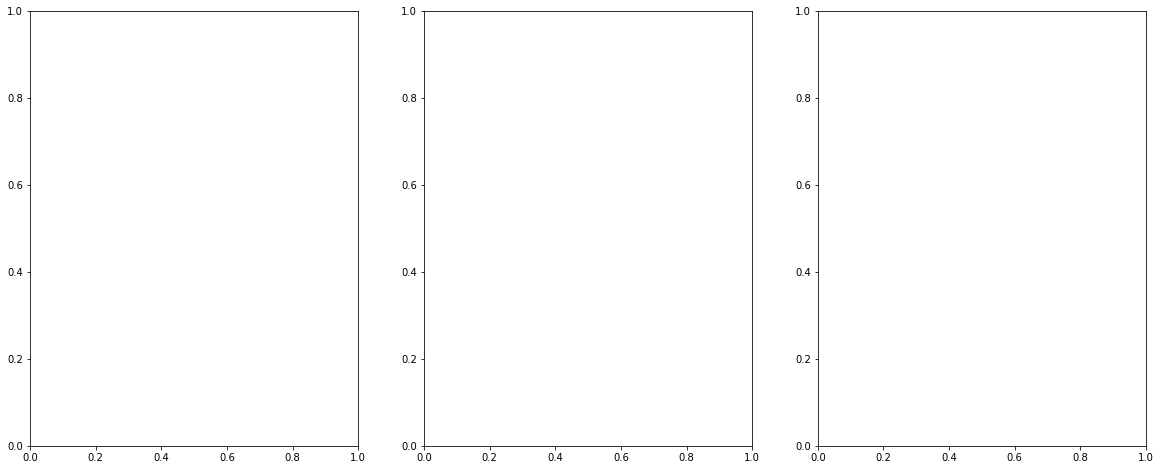

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

In [ ]:
ref, degraded, output, scores = predict('/content/drive/MyDrive/Deep_Learning/Data/images/MNIST4.png')

(1, 27, 26, 1)
1/1 [==============================] - 0s 93ms/step
(15, 14, 3)
(15, 14, 3)
(15, 14, 3)
(15, 14, 3)


Text(0.5, 1.0, 'SRCNN')

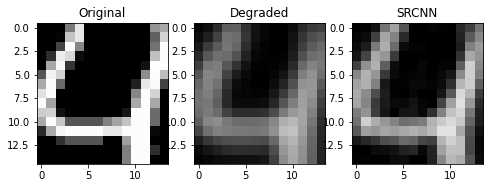

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

In [ ]:
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

Degraded Image: 
PSNR: 11.98159051495783
MSE: 12360.685714285713
SSIM: 0.6667077142008858

Reconstructed Image: 
PSNR: 15.489689529958518
MSE: 5511.028571428571
SSIM: 0.8714073608853838



In [ ]:
ref, degraded, output, scores = predict('/content/drive/MyDrive/Deep_Learning/Data/images/STL1.png')

(1, 96, 95, 1)
1/1 [==============================] - 0s 78ms/step
(84, 83, 3)
(84, 83, 3)
(84, 83, 3)
(84, 83, 3)


Text(0.5, 1.0, 'SRCNN')

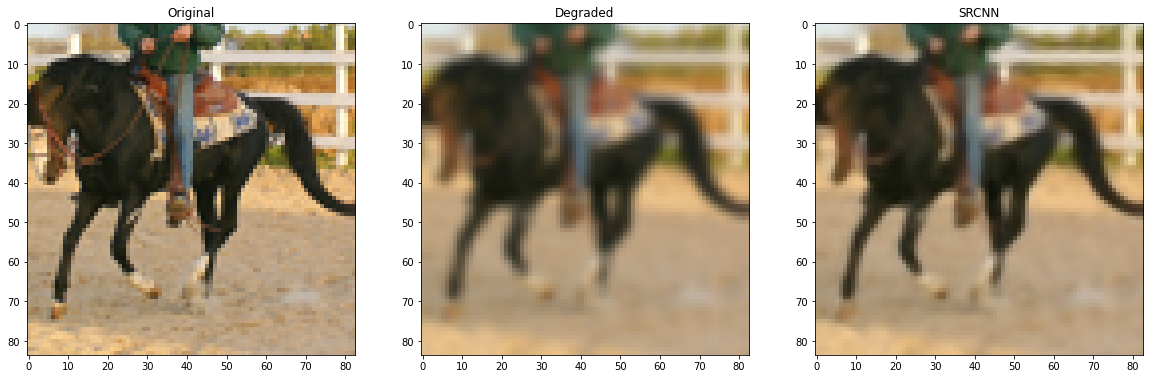

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

In [ ]:
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))

Degraded Image: 
PSNR: 22.38713569928693
MSE: 1125.8694779116465
SSIM: 0.7654221151657049

Reconstructed Image: 
PSNR: 25.076744129282467
MSE: 606.0761617900172
SSIM: 0.8572748843286178



(1, 96, 95, 1)
1/1 [==============================] - 0s 131ms/step
(84, 83, 3)
(84, 83, 3)
(84, 83, 3)
(84, 83, 3)
Degraded Image: 
PSNR: 24.89464135434101
MSE: 632.0296901893288
SSIM: 0.7806846418571981

Reconstructed Image: 
PSNR: 27.131244645670222
MSE: 377.6392713711991
SSIM: 0.8588153125714405



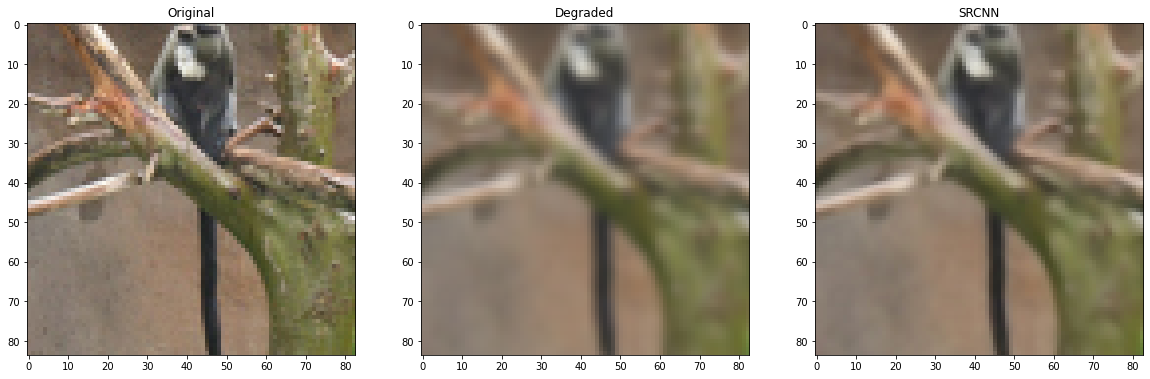

In [ ]:
ref, degraded, output, scores = predict('/content/drive/MyDrive/Deep_Learning/Data/images/STL2.png')
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))